# Behavioral Risk Factor Surveillance System (BRFSS)

<img src="images/BRFSS.jpg"/>

The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey in the United States. The BRFSS is designed to identify risk factors in the adult population and report emerging trends. For example, respondents are asked about their diet and weekly physical activity, their HIV/AIDS status, possible tobacco use, immunization, health status, healthy days - health-related quality of life, health care access, inadequate sleep, hypertension awareness, cholesterol awareness, chronic health conditions, alcohol consumption, fruits and vegetables consumption, arthritis burden, and seatbelt use.

The data were collected from United States’ all 50 states, the District of Columbia, Puerto Rico, Guam and American Samoa, Federated States of Micronesia, and Palau, by conducting both landline telephone- and cellular telephone-based surveys. Disproportionate stratified sampling (DSS) has been used for the landline sample and the cellular telephone respondents are randomly selected with each having equal probability of selection. The dataset we are working on contains 330 variables for a total of 491, 775 observations in 2013. The missing values denoted by “NA”.

The sample data should allow us to generalize to the population of interest. It is a survey of 491,775 U.S. adults aged 18 years or older. It is based on a large stratified random sample. Potential biases are associated with non-response, incomplete interviews, missing values and convenience bias (some potential respondents may not have been included because they do not have a landline and cell phone).

### Libraries

In [1]:
#install.packages("dplyr")
library(dplyr) # for data wrangling

#install.packages("ggplot2")
library(ggplot2) # for data visualization

#install.packages("Hmisc")
library(Hmisc)  # for data wrangling

#install.packages("corrplot")
library(corrplot) # for advanced plot in correlation

#install.packages("ROCR")
library(ROCR) # for ROC curve


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units


corrplot 0.84 loaded



### Load Data

In [2]:
load("data/brfss2013.Rdata")
head(brfss2013)

,X_state,fmonth,idate,imonth,iday,iyear,dispcode,seqno,X_psu,ctelenum,⋯,X_pastae1,X_lmtact1,X_lmtwrk1,X_lmtscl1,X_rfseat2,X_rfseat3,X_flshot6,X_pneumo2,X_aidtst3,X_age80
,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,Alabama,January,1092013,January,9,2013,Completed interview,2013000580,2013000580,Yes,⋯,Did not meet both guidelines,Told have arthritis and have limited usual activities,Told have arthritis and have limited work,Told have arthritis and social activities limited a lot,Always or almost always wear seat belt,Always wear seat belt,NA,NA,No,60
2,Alabama,January,1192013,January,19,2013,Completed interview,2013000593,2013000593,Yes,⋯,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,NA,NA,Yes,50
3,Alabama,January,1192013,January,19,2013,Completed interview,2013000600,2013000600,Yes,⋯,Did not meet both guidelines,Told have arthritis and have limited usual activities,Told have arthritis and have limited work,Told have arthritis and social activities limited a little,Always or almost always wear seat belt,Always wear seat belt,NA,NA,Yes,55
4,Alabama,January,1112013,January,11,2013,Completed interview,2013000606,2013000606,Yes,⋯,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,NA,NA,No,64
5,Alabama,February,2062013,February,6,2013,Completed interview,2013000608,2013000608,Yes,⋯,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,No,No,No,66
6,Alabama,March,3272013,March,27,2013,Completed interview,2013000630,2013000630,Yes,⋯,Did not meet both guidelines,Not told they have arthritis,Not told they have arthritis,Not told they have arthritis,Always or almost always wear seat belt,Always wear seat belt,NA,NA,Yes,49


## Some Exploration

In [3]:
str(brfss2013)

'data.frame':	491775 obs. of  330 variables:
 $ X_state  : Factor w/ 55 levels "0","Alabama",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ fmonth   : Factor w/ 12 levels "January","February",..: 1 1 1 1 2 3 3 3 4 4 ...
 $ idate    : int  1092013 1192013 1192013 1112013 2062013 3272013 3222013 3042013 4242013 4242013 ...
 $ imonth   : Factor w/ 12 levels "January","February",..: 1 1 1 1 2 3 3 3 4 4 ...
 $ iday     : Factor w/ 31 levels "1","2","3","4",..: 9 19 19 11 6 27 22 4 24 24 ...
 $ iyear    : Factor w/ 2 levels "2013","2014": 1 1 1 1 1 1 1 1 1 1 ...
 $ dispcode : Factor w/ 2 levels "Completed interview",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ seqno    : int  2013000580 2013000593 2013000600 2013000606 2013000608 2013000630 2013000634 2013000644 2013001305 2013001338 ...
 $ X_psu    : int  2013000580 2013000593 2013000600 2013000606 2013000608 2013000630 2013000634 2013000644 2013001305 2013001338 ...
 $ ctelenum : Factor w/ 1 level "Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ pvtresd1 : Factor w/ 2 levels "Yes","N

## Research question 1: 

**Does the distribution of the number of days in which physical and mental health was not good during the past 30 days differ by gender?**

Variables:

        physhlth: Number Of Days Physical Health Not Good
    
        menthlth: Number Of Days Mental Health Not Good

In [4]:
summary(brfss2013$sex)

Male Female   NA's 
201313 290455      7

Since the number of women who responded to this survey (290455) is much greater than the number of men who responded to this survey (201313), we cannot directly compare numbers, only the format of the distribution.

Warning message:
"Removed 10953 rows containing non-finite values (stat_bin)."


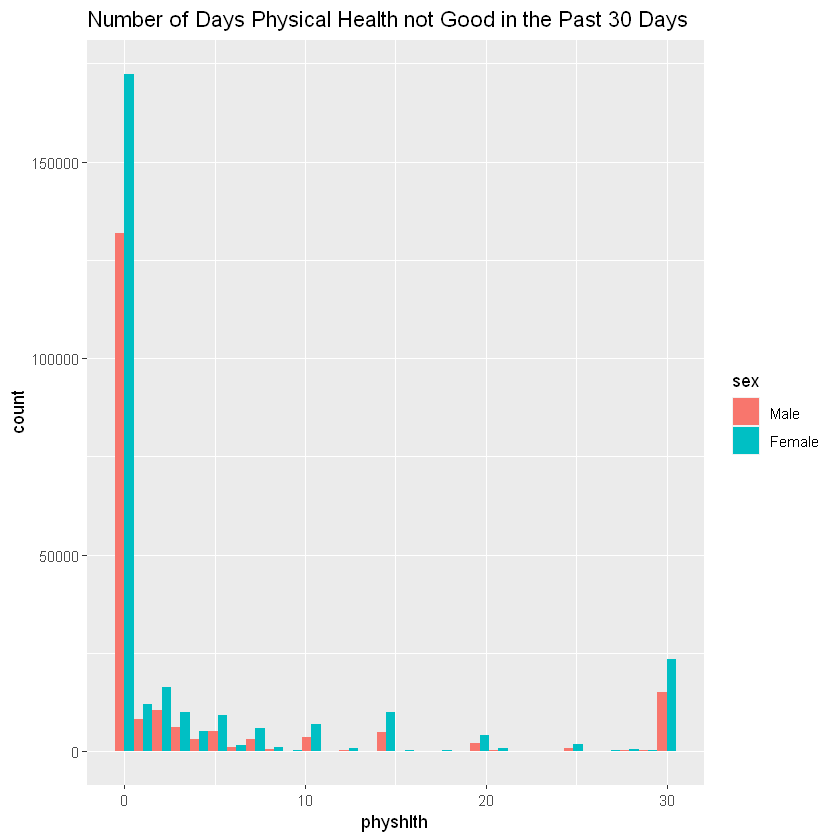

In [5]:
ggplot(aes(x=physhlth, fill=sex), data = brfss2013[!is.na(brfss2013$sex), ]) +
  geom_histogram(bins=30, position = position_dodge()) + ggtitle('Number of Days Physical Health not Good in the Past 30 Days')

In [6]:
tapply(brfss2013$physhlth, brfss2013$sex, summary, na.rm=TRUE)

$Male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   3.926   2.000  30.000    3818 

$Female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00    0.00    4.65    4.00   30.00    7135 


In [7]:
tapply(brfss2013$physhlth, brfss2013$sex, IQR, na.rm=TRUE)

Male Female 
     2      4

Warning message:
"Removed 8623 rows containing non-finite values (stat_bin)."


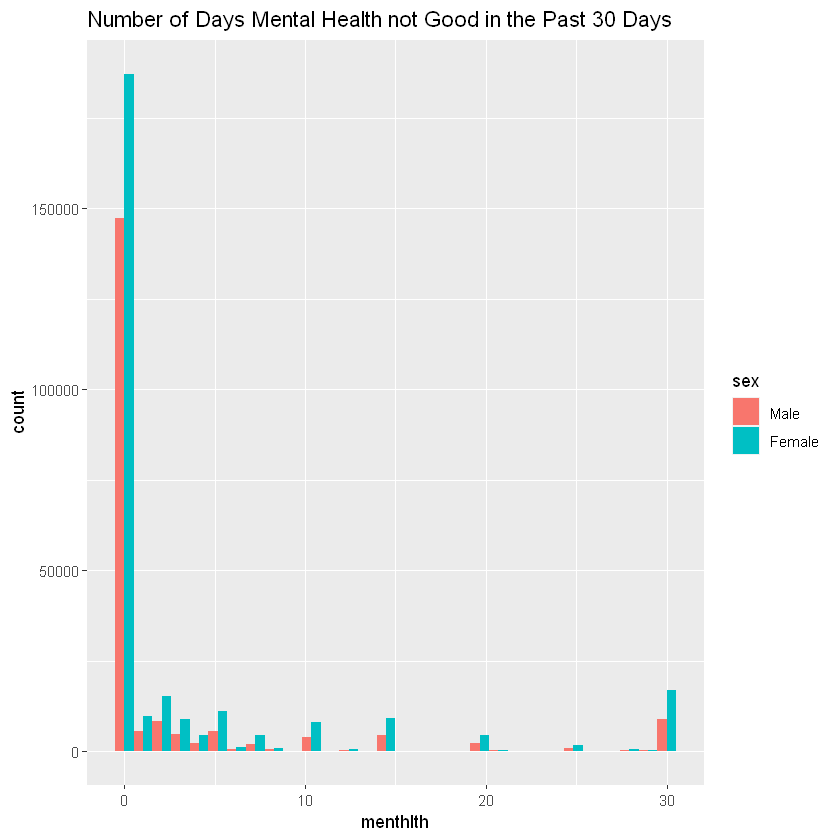

In [8]:
ggplot(aes(x=menthlth, fill=sex), data=brfss2013[!is.na(brfss2013$sex), ]) +
  geom_histogram(bins=30, position = position_dodge()) + ggtitle('Number of Days Mental Health not Good in the Past 30 Days')

In [9]:
tapply(brfss2013$menthlth, brfss2013$sex, summary, na.rm=TRUE)

$Male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   2.779   1.000  30.000    3247 

$Female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   3.784   3.000  30.000    5376 


In [10]:
tapply(brfss2013$menthlth, brfss2013$sex, IQR, na.rm=TRUE)

Male Female 
     1      3

Conclusion: Both have the same behaviour curve.

## Research question 2: 

**Is there an association between the month in which a respondent was interviewed and the respondent’s self-reported health perception?**

Variables:

        iyear: Interview Year
    
        imonth: Interview Month
        
        genhlth: General Health

In [11]:
by_month1 <- brfss2013 %>% filter(iyear=='2013') %>% group_by(imonth) %>% summarise(n=n())

`summarise()` ungrouping output (override with `.groups` argument)



In [12]:
by_month1

imonth,n
<fct>,<int>
January,29674
February,41860
March,44315
April,42936
May,40418
June,37912
July,43667
August,42301
September,38563


In [13]:
by_month1.num <- by_month1[, 2] # Only the n column
colSums(by_month1.num) # Total of column

n 
486088

In [14]:
by_month1$total <- colSums(by_month1.num)
head(by_month1)

imonth,n,total
<fct>,<int>,<dbl>
January,29674,486088
February,41860,486088
March,44315,486088
April,42936,486088
May,40418,486088
June,37912,486088


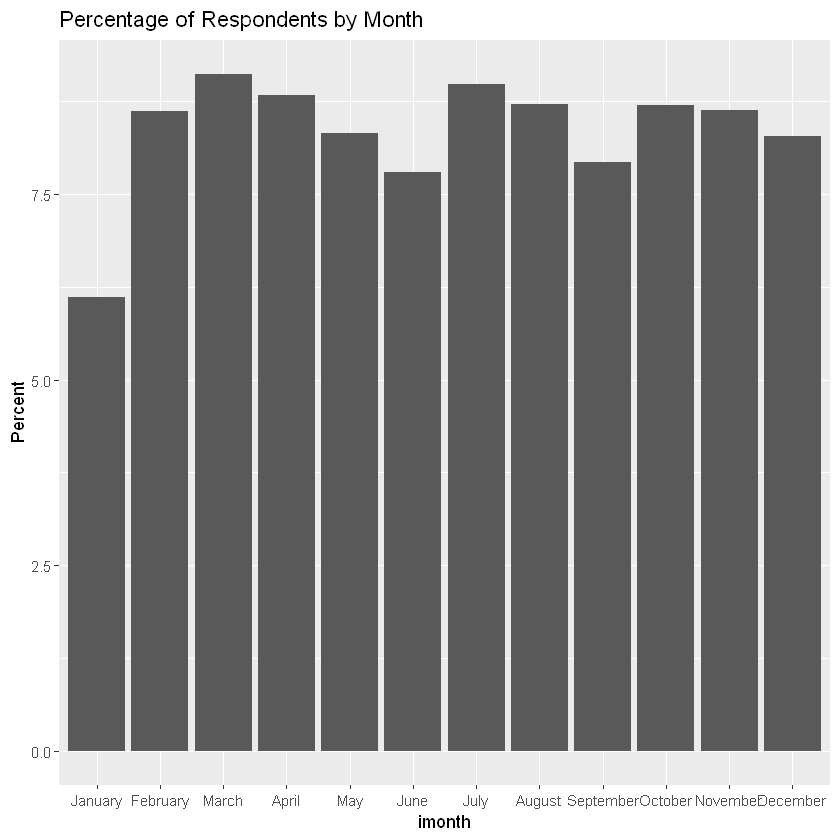

In [15]:
ggplot(aes(x=imonth, y=n/total*100), data=by_month1) + 
    geom_bar(stat = 'identity') + 
    ggtitle('Percentage of Respondents by Month')+ 
    ylab('Percent')

In [16]:
by_month2 <- brfss2013 %>% filter(iyear=='2013') %>% group_by(imonth, genhlth) %>% summarise(no=n())
head(by_month2)

`summarise()` regrouping output by 'imonth' (override with `.groups` argument)



imonth,genhlth,no
<fct>,<fct>,<int>
January,Excellent,5232
January,Very good,9730
January,Good,8982
January,Fair,3929
January,Poor,1692
January,NA,109


In [17]:
by_month2 <- left_join(by_month2, by_month1, by='imonth')
head(by_month2)

imonth,genhlth,no,n,total
<fct>,<fct>,<int>,<int>,<dbl>
January,Excellent,5232,29674,486088
January,Very good,9730,29674,486088
January,Good,8982,29674,486088
January,Fair,3929,29674,486088
January,Poor,1692,29674,486088
January,NA,109,29674,486088


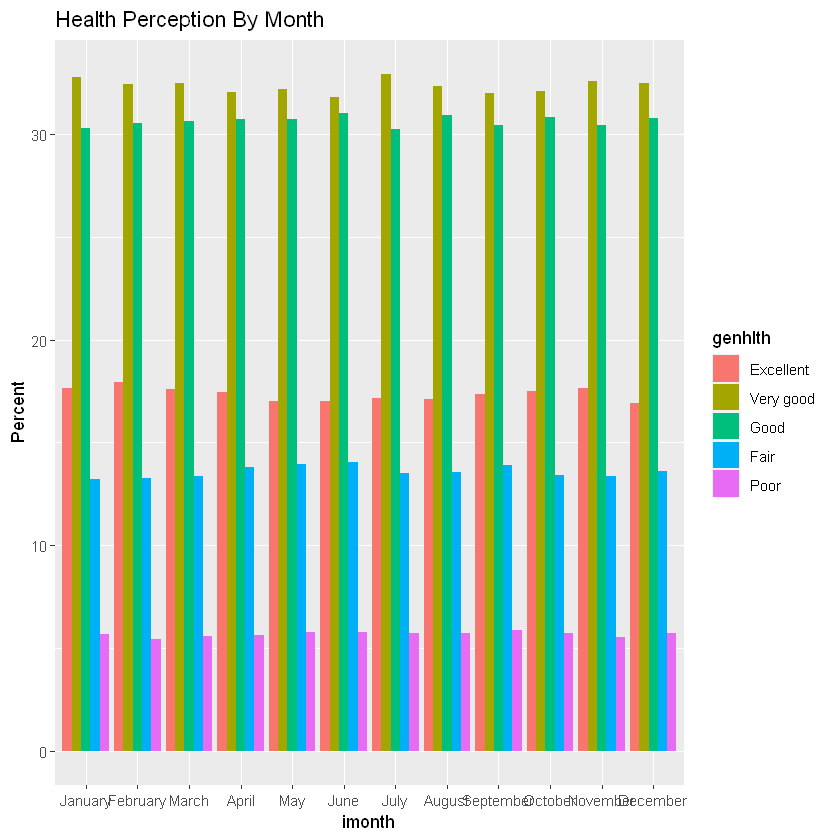

In [18]:
ggplot(aes(x=imonth, y=no/n*100, fill = genhlth), data = by_month2[!is.na(by_month2$genhlth), ]) + 
    geom_bar(stat = 'identity', position = position_dodge()) + 
    ggtitle('Health Perception By Month') + 
    ylab('Percent')

Conclusion: There is no association between the month and the respondent’s self-reported health perception.

## Research question 3: 

**Is there any association between a respondent’s income and health care coverage?**

Variables:

        income2: Income Level
    
        hlthpln1: Have Any Health Care Coverage

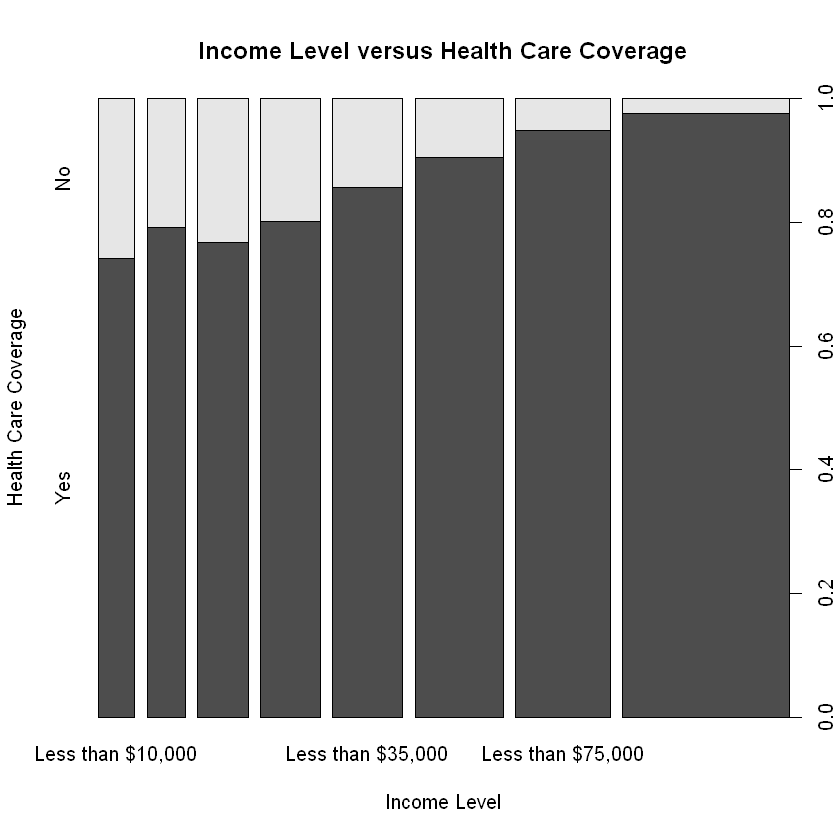

In [19]:
plot(brfss2013$income2, brfss2013$hlthpln1, xlab = 'Income Level', ylab = 'Health Care Coverage', main =
'Income Level versus Health Care Coverage')

In [20]:
tapply(brfss2013$hlthpln1, brfss2013$income2, summary, na.rm=TRUE)

$`Less than $10,000`
  Yes    No  NA's 
18732  6551   158 

$`Less than $15,000`
  Yes    No  NA's 
21143  5558    93 

$`Less than $20,000`
  Yes    No  NA's 
26695  8061   117 

$`Less than $25,000`
  Yes    No  NA's 
33312  8295   125 

$`Less than $35,000`
  Yes    No  NA's 
41738  7024   105 

$`Less than $50,000`
  Yes    No  NA's 
55575  5824   110 

$`Less than $75,000`
  Yes    No  NA's 
61732  3414    85 

$`$75,000 or more`
   Yes     No   NA's 
113023   2771    108

Conclusion: Higher income respondents are more likely to have health care coverage then those of lower income respondents.

## Research question 4: 

**Is there a correlation between high blood pressure and time slept per night, and can an association between both aforementioned variables and weight be inferred?**

Variables:

        bphigh4: Ever Told Blood Pressure High

        sleptim1: How Much Time Do You Sleep

        weight2: Reported Weight In Pounds

In [21]:
# Select the DataFrame
vars2 <- names(brfss2013) %in% c('bphigh4', 'sleptim1', 'bphigh4', 'weight2')
selected2_brfss <- brfss2013[vars2]

head(selected2_brfss)

nrows <- nrow(selected2_brfss)
paste("Number of Rows: ",nrows)

,sleptim1,bphigh4,weight2
,<int>,<fct>,<fct>
1,NA,Yes,250
2,6,No,127
3,9,No,160
4,8,No,128
5,6,Yes,265
6,8,Yes,225


[1] "Number of Rows:  491775"

In [22]:
# Delete NA values
selected2_brfss <- na.delete(selected2_brfss)

head(selected2_brfss)

nrows <- nrow(selected2_brfss)
paste("Number of Rows: ", nrows)

,sleptim1,bphigh4,weight2
,<int>,<fct>,<fct>
2,6,No,127
3,9,No,160
4,8,No,128
5,6,Yes,265
6,8,Yes,225
7,7,Yes,106


[1] "Number of Rows:  483140"

In [23]:
# Create a DataFrame hibsleep
hibsleep <- selected2_brfss %>% filter((bphigh4 == "Yes" | bphigh4 == "No"), !(is.na(sleptim1)), !(is.na(weight2)))

head(hibsleep)

nrows2 <- nrow(hibsleep)
paste("Number of Rows: ", nrows2)

,sleptim1,bphigh4,weight2
,<int>,<fct>,<fct>
1,6,No,127
2,9,No,160
3,8,No,128
4,6,Yes,265
5,8,Yes,225
6,7,Yes,106


[1] "Number of Rows:  474508"

In [24]:
# Transform series Weight2 in numeric
hibsleep$weight2 <- as.numeric(as.character(hibsleep$weight2))

head(hibsleep)

nrows2 <- nrow(hibsleep)
paste("Number of Rows: ", nrows2)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


,sleptim1,bphigh4,weight2
,<int>,<fct>,<dbl>
1,6,No,127
2,9,No,160
3,8,No,128
4,6,Yes,265
5,8,Yes,225
6,7,Yes,106


[1] "Number of Rows:  474508"

In [25]:
# Take out the influence of weight influence in the high blood
hibsleep <- hibsleep %>% filter(weight2 < 1000) 
nrows2 <- nrow(hibsleep)
paste("Number of Rows: ", nrows2)

[1] "Number of Rows:  454501"

In [26]:
# Divides a numeric vector into different ranges
hibsleep$weight2 = cut(hibsleep$weight2,c(49,100,150,200,250,300,700)) 

class(hibsleep$weight2)

[1] "factor"

In [27]:
# Create levels for Weight2
hibsleep <- hibsleep %>% group_by(weight2)

levels(hibsleep$weight2) <- c("50-100","100-150","150-200", "200-250", "250-300", "300-700")

head(hibsleep$weight2)
nrows2 <- nrow(hibsleep)
paste("Number of Rows: ", nrows2)

[1] 100-150 150-200 100-150 250-300 200-250 100-150
Levels: 50-100 100-150 150-200 200-250 250-300 300-700

[1] "Number of Rows:  454501"

In [28]:
hibsleep <- hibsleep %>% mutate(sleptim1 = ifelse(sleptim1 < 11, sleptim1,"11+"))

head(hibsleep)
nrows2 <- nrow(hibsleep)
paste("Number of Rows: ", nrows2)

sleptim1,bphigh4,weight2
<chr>,<fct>,<fct>
6,No,100-150
9,No,150-200
8,No,100-150
6,Yes,250-300
8,Yes,200-250
7,Yes,100-150


[1] "Number of Rows:  454501"

In [29]:
# Create leves for Sleptim1
hibsleep$sleptim1 <- factor(hibsleep$sleptim1, levels = c("1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11+"))
head(hibsleep)

sleptim1,bphigh4,weight2
<fct>,<fct>,<fct>
6,No,100-150
9,No,150-200
8,No,100-150
6,Yes,250-300
8,Yes,200-250
7,Yes,100-150


In [30]:
hibsleep %>% group_by(sleptim1, bphigh4) %>% summarise(count=n())

`summarise()` regrouping output by 'sleptim1' (override with `.groups` argument)



sleptim1,bphigh4,count
<fct>,<fct>,<int>
1,Yes,96
1,No,108
2,Yes,561
2,No,446
3,Yes,1751
3,No,1517
4,Yes,6718
4,No,6635
5,Yes,14151


From the proportions of having high blood pressure to not having high blood pressure, there appears to be not be a distinct correlation.


In [31]:
hibsleep %>% group_by(weight2, bphigh4) %>% summarise(count=n()) 


`summarise()` regrouping output by 'weight2' (override with `.groups` argument)



weight2,bphigh4,count
<fct>,<fct>,<int>
50-100,Yes,1448
50-100,No,3026
100-150,Yes,43858
100-150,No,98619
150-200,Yes,84538
150-200,No,118999
200-250,Yes,41193
200-250,No,38208
250-300,Yes,12001


Surmised from the proportions of having and not having high blood pressure in each range, there is a clear correlation between weight and high blood pressure, as the percentage of those with high blood pressure increases with weight range.


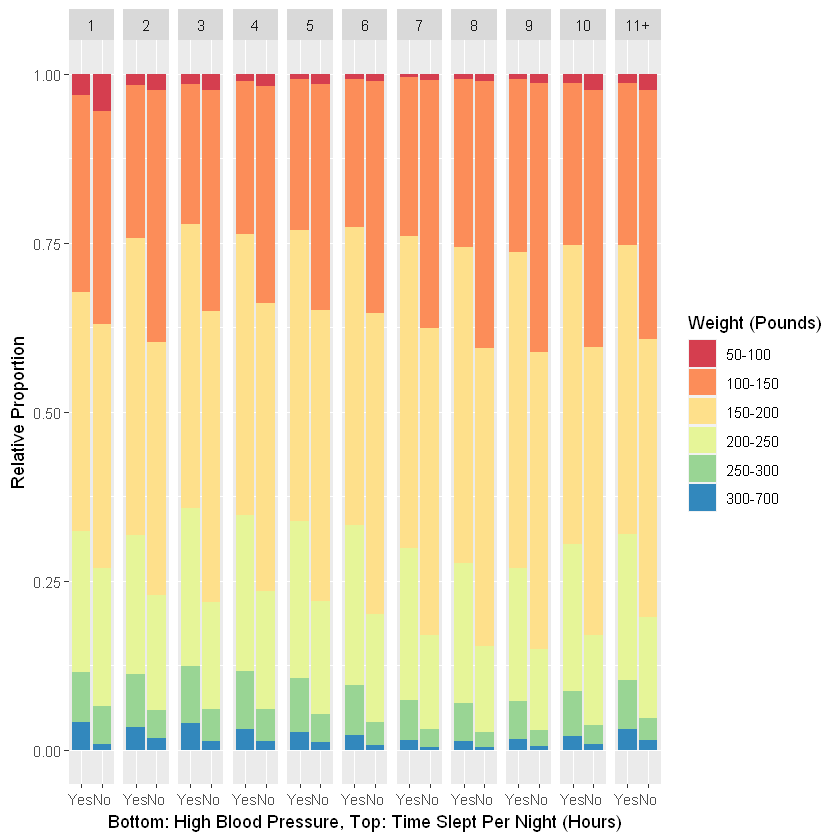

In [32]:
ggplot(hibsleep) + 
    aes(x = bphigh4, fill = weight2) + 
    geom_bar(position = "fill") + 
    facet_grid(.~sleptim1) +
    scale_fill_brewer(name="Weight (Pounds)", palette = "Spectral") + 
    xlab("Bottom: High Blood Pressure, Top: Time Slept Per Night (Hours)") + 
    ylab("Relative Proportion")

Conclusion: From the uniform distribution of time slept against weight, there appears to be no correlation between the two statistics. This is especially evident in that regardless of hours slept weight distributed such that those with high blood pressure tend to have greater weight. 

However, the positive relationship between high blood pressure and weight hints at a positive correlation. Therefore, we can assert that there is no correlation between time slept and weight but that there is a correlation between weight and high blood pressure.


## Research question 5: 

**Is there any relation between smoking, drinking alcohol, cholesterol level, blood pressure, weight and having a stroke? Eventually, I would like to see whether stroke can be predicted from the above mentioned variables.**

Variables:

        smoke100: Smoked At Least 100 Cigarettes

        avedrnk2: Avg Alcoholic Drinks Per Day In Past 30

        bphigh4: Ever Told Blood Pressure High

        toldhi2: Ever Told Blood Cholesterol High

        weight2: Reported Weight In Pounds

        cvdstrk3: Ever Diagnosed With A Stroke

In [33]:
# Build a Dataframe with series selected
vars <- names(brfss2013) %in% c('smoke100', 'avedrnk2', 'bphigh4', 'toldhi2', 'weight2')
selected_brfss <- brfss2013[vars]
head(selected_brfss)

,bphigh4,toldhi2,weight2,smoke100,avedrnk2
,<fct>,<fct>,<fct>,<fct>,<int>
1,Yes,Yes,250,Yes,2
2,No,No,127,No,NA
3,No,No,160,Yes,4
4,No,Yes,128,No,2
5,Yes,No,265,Yes,2
6,Yes,Yes,225,No,NA


In [34]:
selected_brfss$toldhi2 <- ifelse(selected_brfss$toldhi2=="Yes", 1, 0)

selected_brfss$smoke100 <- ifelse(selected_brfss$smoke100=="Yes", 1, 0)

selected_brfss$weight2 <- as.numeric(selected_brfss$weight2)

selected_brfss$bphigh4 <- as.factor(ifelse(selected_brfss$bphigh4=="Yes", "Yes", 
                                    (ifelse(selected_brfss$bphigh4=="Yes, but female told only during pregnancy", "Yes", 
                                    (ifelse(selected_brfss$bphigh4=="Told borderline or pre-hypertensive", "Yes", "No"))))))

selected_brfss$bphigh4 <- ifelse(selected_brfss$bphigh4=="Yes", 1, 0)

In [35]:
head(selected_brfss)

,bphigh4,toldhi2,weight2,smoke100,avedrnk2
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,154,1,2
2,0,0,30,0,NA
3,0,0,63,1,4
4,0,1,31,0,2
5,1,0,169,1,2
6,1,1,128,0,NA


In [36]:
# Delete NA values
selected_brfss <- na.delete(selected_brfss)

In [37]:
corr.matrix <- cor(selected_brfss)
corr.matrix

,bphigh4,toldhi2,weight2,smoke100,avedrnk2
bphigh4,1.000000000,0.27914347,0.14005254,0.10912129,-0.002122668
toldhi2,0.279143470,1.00000000,0.06121341,0.08997636,-0.029376184
weight2,0.140052536,0.06121341,1.00000000,0.04240647,0.093800446
smoke100,0.109121295,0.08997636,0.04240647,1.00000000,0.115787685
avedrnk2,-0.002122668,-0.02937618,0.09380045,0.11578768,1.000000000


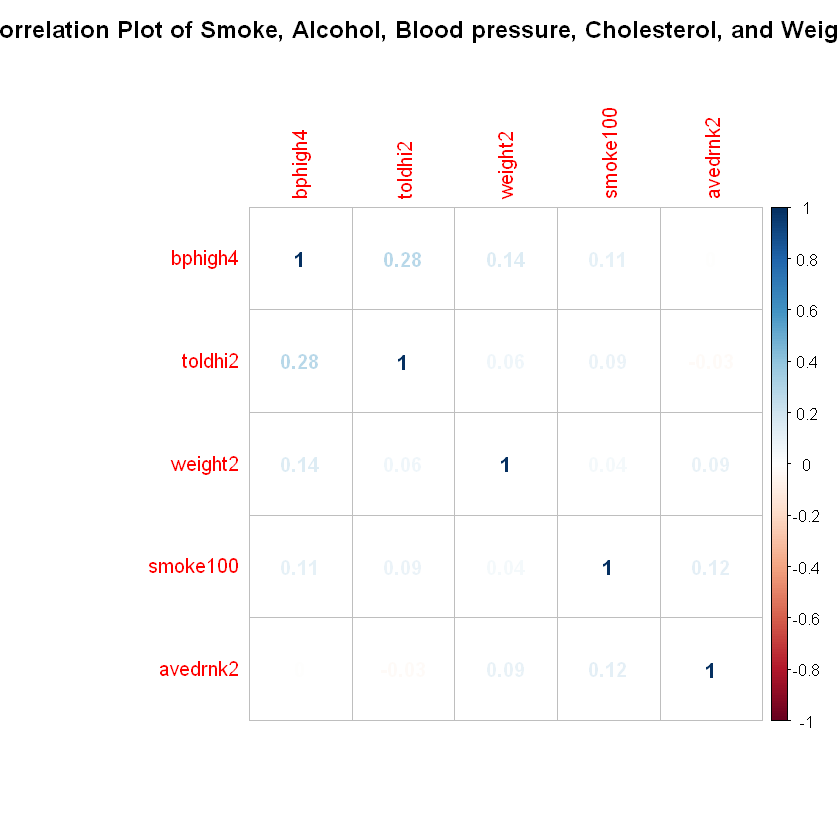

In [38]:
corrplot(corr.matrix, main="\n\n Correlation Plot of Smoke, Alcohol, Blood pressure, Cholesterol, and Weight", method="number")

No any two numeric variables seem to have strong correlations.

## Logistic Regression to Predict Stroke

In [39]:
# Build a Dataframe with series selected
vars2 <- names(brfss2013) %in% c('smoke100', 'avedrnk2', 'bphigh4', 'toldhi2', 'weight2', 'cvdstrk3')
stroke <- brfss2013[vars2]
head(stroke)

,bphigh4,toldhi2,cvdstrk3,weight2,smoke100,avedrnk2
,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,Yes,Yes,No,250,Yes,2
2,No,No,No,127,No,NA
3,No,No,No,160,Yes,4
4,No,Yes,No,128,No,2
5,Yes,No,No,265,Yes,2
6,Yes,Yes,No,225,No,NA


In [40]:
# Replace the answer “Yes, but female told only during pregnancy” and “Told borderline or pre-hypertensive” with “Yes”.
stroke$bphigh4 <- as.factor(ifelse(stroke$bphigh4=="Yes", "Yes", 
                           (ifelse(stroke$bphigh4=="Yes, but female told only during pregnancy", "Yes", 
                           (ifelse(stroke$bphigh4=="Told borderline or pre-hypertensive", "Yes", "No"))))))

# Transform serie weight2 in numeric
stroke$weight2<-as.numeric(stroke$weight2)

In [41]:
# Replace ‘NA’ values with ‘No’.
stroke$bphigh4 <- replace(stroke$bphigh4, which(is.na(stroke$bphigh4)), "No")
stroke$toldhi2 <- replace(stroke$toldhi2, which(is.na(stroke$toldhi2)), "No")
stroke$cvdstrk3 <- replace(stroke$cvdstrk3, which(is.na(stroke$cvdstrk3)), "No")
stroke$smoke100 <- replace(stroke$smoke100, which(is.na(stroke$smoke100)), 'No')

In [42]:
mean(stroke$avedrnk2,na.rm = T)

[1] 2.209905

In [43]:
# Replace ‘NA’ value by average.
stroke$avedrnk2 <- replace(stroke$avedrnk2, which(is.na(stroke$avedrnk2)), 2.21)

In [44]:
summary(stroke)

 bphigh4      toldhi2      cvdstrk3        weight2       smoke100    
 No :284107   Yes:183501   Yes: 20391   Min.   :  1.00   Yes:215201  
 Yes:207668   No :308274   No :471384   1st Qu.: 43.00   No :276574  
                                        Median : 73.00               
                                        Mean   : 80.22               
                                        3rd Qu.:103.00               
                                        Max.   :570.00               
    avedrnk2    
 Min.   : 1.00  
 1st Qu.: 2.00  
 Median : 2.21  
 Mean   : 2.21  
 3rd Qu.: 2.21  
 Max.   :76.00  

In [45]:
head(stroke)

,bphigh4,toldhi2,cvdstrk3,weight2,smoke100,avedrnk2
,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>
1,Yes,Yes,No,154,Yes,2.00
2,No,No,No,30,No,2.21
3,No,No,No,63,Yes,4.00
4,No,Yes,No,31,No,2.00
5,Yes,No,No,169,Yes,2.00
6,Yes,Yes,No,128,No,2.21


In [46]:
# Covert to binary outcome.
stroke$cvdstrk3 <- ifelse(stroke$cvdstrk3=="Yes", 1, 0)

head(stroke)

nrows3 <- nrow(stroke)
paste("Number of Rows: ", nrows3)

,bphigh4,toldhi2,cvdstrk3,weight2,smoke100,avedrnk2
,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
1,Yes,Yes,0,154,Yes,2.00
2,No,No,0,30,No,2.21
3,No,No,0,63,Yes,4.00
4,No,Yes,0,31,No,2.00
5,Yes,No,0,169,Yes,2.00
6,Yes,Yes,0,128,No,2.21


[1] "Number of Rows:  491775"

### Logistic Regression Model Fitting

In [47]:
train <- stroke[1:390000,]
test <- stroke[390001:491775,]

In [48]:
model <- glm(cvdstrk3 ~.,family=binomial(link = 'logit'),data=train)
summary(model)


Call:
glm(formula = cvdstrk3 ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5011  -0.3666  -0.2107  -0.1625   3.1191  

Coefficients:
              Estimate Std. Error  z value Pr(>|z|)    
(Intercept) -3.3106381  0.0264120 -125.346  < 2e-16 ***
bphigh4Yes   1.3064774  0.0193462   67.531  < 2e-16 ***
toldhi2No   -0.5705937  0.0171500  -33.271  < 2e-16 ***
weight2     -0.0009949  0.0001489   -6.681 2.37e-11 ***
smoke100No  -0.3944464  0.0163780  -24.084  < 2e-16 ***
avedrnk2    -0.0062822  0.0056728   -1.107    0.268    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 136364  on 389999  degrees of freedom
Residual deviance: 126666  on 389994  degrees of freedom
AIC: 126678

Number of Fisher Scoring iterations: 6


**Interpreting the results of the logistic regression model:**

    All the variables are statistically significant.

    All other variables being equal, being told blood pressure high is more likely to have a stroke.

    The negative coefficient for the predictor - toldhi2No suggests that all other variables being equal, not being told blood cholesterol high is less likely to have a stroke.

    For every one unit change in weight, the log odds of having a stroke (versus no-stroke) decreases by 0.00096.

    Not Smoked At Least 100 Cigarettes, less likely to have a stroke.

    For a one unit increase in Avg alcoholic drinks per day in past 30 days, the log odds of having a stroke decreases by 0.027.

In [49]:
anova(model, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,389999,136364.2,NA
bphigh4,1,7848.644164,389998,128515.5,0.000000e+00
toldhi2,1,1230.074132,389997,127285.5,1.775899e-269
weight2,1,33.168088,389996,127252.3,8.452641e-09
smoke100,1,584.549407,389995,126667.8,3.841482e-129
avedrnk2,1,1.266506,389994,126666.5,2.604231e-01


Analyzing the deviance table, we can see the drop in deviance when adding each variable one at a time. Adding bphigh4, toldhi2, smoke100 significantly reduces the residual deviance. The other variables weight2 and avedrnk2 seem to imrove the model less even though they all have low p-values.

### Assessing the predictive ability of the model

In [50]:
fitted.results <- predict(model,newdata=test,type='response')
fitted.results <- ifelse(fitted.results > 0.5,1,0)

misClasificError <- mean(fitted.results != test$cvdstrk3)
print(paste('Accuracy',1-misClasificError))

[1] "Accuracy 0.961296978629329"


The 0.96 accuracy on the test set is a very good result.

### Plot the ROC curve and calculate the AUC (area under the curve)

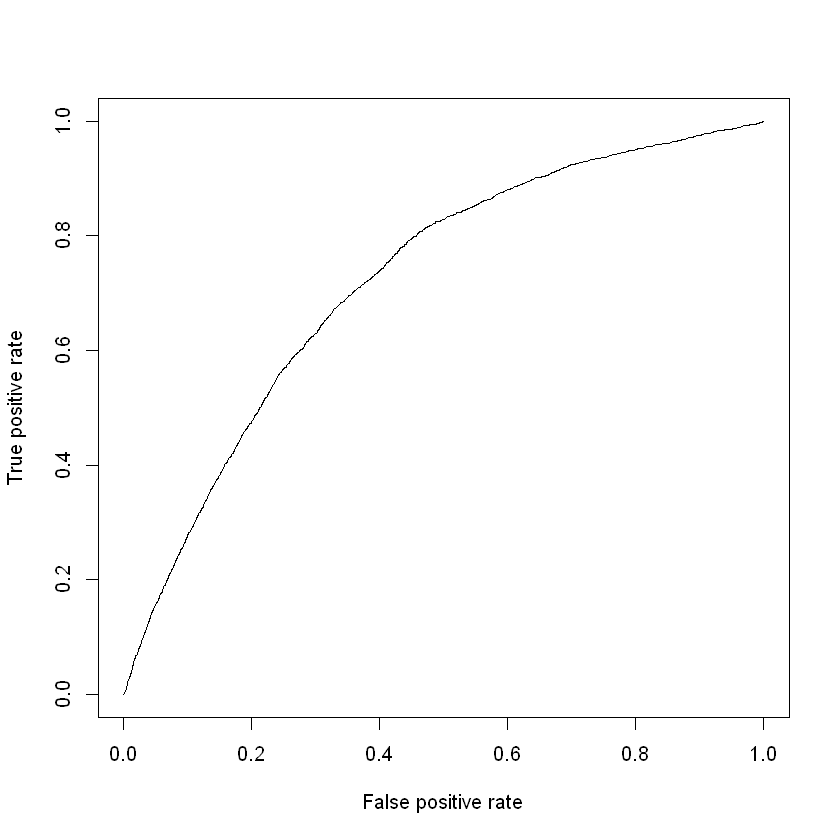

In [51]:
p <- predict(model, newdata=test, type="response")
pr <- prediction(p, test$cvdstrk3)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

In [52]:
auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

[1] 0.7220961